In [168]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

In [67]:
minst_df = fetch_openml('mnist_784')

In [68]:
# raw DataFrame
minst_df

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [69]:
# covert DataFrame to Numpy array
mnist = fetch_openml('mnist_784', as_frame=False)

In [70]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [71]:
X, y = mnist.data, mnist.target

In [72]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1 * 784 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232
  40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15
 152 239 252 252 252 216  31  37 252 252  6

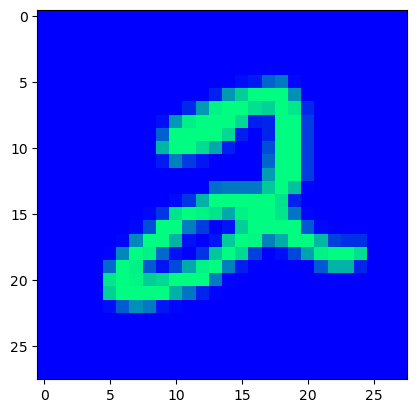

In [73]:
def plot_digit(image_data):
    print('1 * 784', image_data)
    image = image_data.reshape(28, 28)
    print('\n\n\n\n 28 * 28 \n', image)
    plt.imshow(image, cmap='winter')

plot_digit(X[5])

In [74]:
y[5]

'2'

In [75]:
# split training(first 60000ths) and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [77]:
# good for very large datasets
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [78]:
# predicts 5 and non-5 digits
sgd_clf.predict([X[0]])

array([ True])

In [79]:
# performance measurement evaluation on SGD
y_train_pred = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
y_train_pred

array([0.95035, 0.96035, 0.9604 ])

In [80]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [81]:
any(dummy_clf.predict(X_train))

False

In [82]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [83]:
y_hat = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_hat

array([ True, False, False, ...,  True, False, False])

In [84]:
cm = confusion_matrix(y_train_5, y_hat)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [85]:
# we assume that we predict all outputs correctly
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [86]:
# it is correct only 83.7% of the time
precision_score(y_train_5, y_hat)

0.8370879772350012

In [87]:
# it only detects 65.1% of the 5s.
recall_score(y_train_5, y_hat)

0.6511713705958311

In [88]:
# mean of recall and precision score
f1_score(y_train_5, y_hat)

0.7325171197343847

In [89]:
y_score = sgd_clf.decision_function([X[0]])
y_score

array([2164.22030239])

In [90]:
# The SGDClassifier uses a threshold equal to 0, so the preceding code returns the same result as the predict() method
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [91]:
threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [92]:
# gets scores of all instances in the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [93]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [94]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [95]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [96]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [97]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

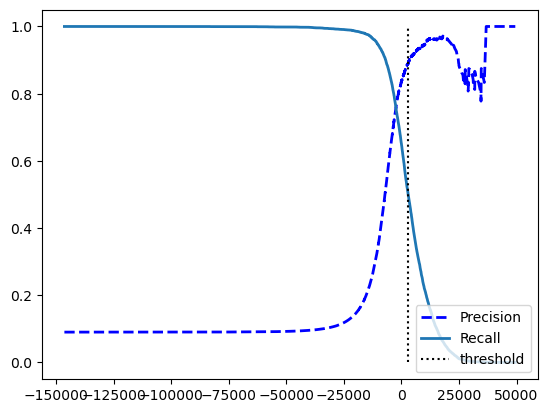

In [98]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend(loc="lower right")

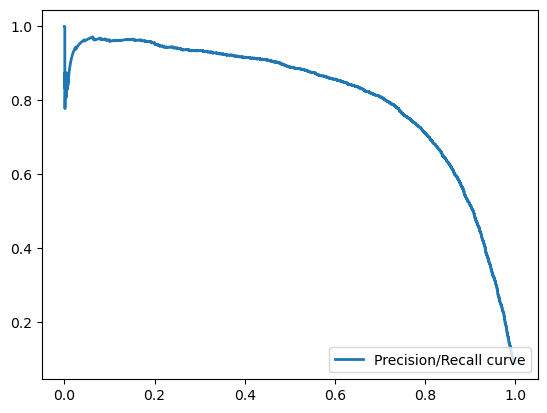

In [99]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.legend(loc="lower right")

In [100]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [101]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [102]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [103]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [104]:
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [105]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

In [106]:
tpr_90

np.float64(0.4799852425751706)

In [107]:
fpr_90

np.float64(0.005295076861063779)

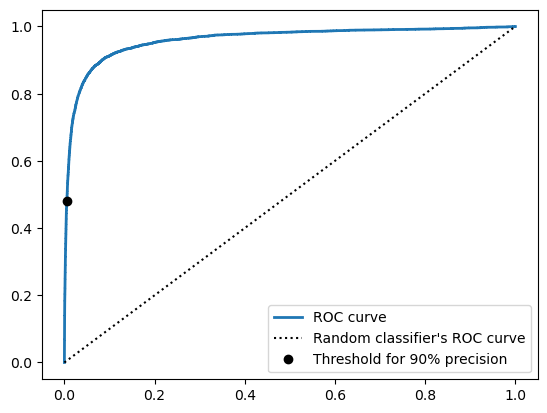

In [108]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend(loc="lower right")

In [109]:
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [110]:
forest_clf = RandomForestClassifier(random_state=42)

In [111]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [112]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [113]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [114]:
# precision and recall curve with random forest models
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
precisions_forest

array([0.09035   , 0.15601796, 0.21697018, 0.2782198 , 0.3359375 ,
       0.39168474, 0.4434341 , 0.49221099, 0.53883011, 0.58103448,
       0.62384152, 0.65814579, 0.69354839, 0.72090213, 0.74856904,
       0.77310803, 0.79370733, 0.81468478, 0.83029737, 0.84566529,
       0.8605178 , 0.87232994, 0.88209825, 0.89121268, 0.90208833,
       0.90986159, 0.9178634 , 0.92464178, 0.93120086, 0.93672255,
       0.94127273, 0.94605505, 0.95223107, 0.95618941, 0.95927941,
       0.96257089, 0.96431961, 0.96689629, 0.96939365, 0.97113522,
       0.97292032, 0.975495  , 0.97634069, 0.9787572 , 0.98101519,
       0.98323571, 0.98412375, 0.98566455, 0.98719273, 0.98773389,
       0.98974681, 0.99050833, 0.99129327, 0.99186644, 0.99180858,
       0.99259582, 0.99340804, 0.99378606, 0.99440841, 0.99458239,
       0.99474526, 0.99514451, 0.99555659, 0.99622997, 0.99618594,
       0.99638031, 0.9965661 , 0.99652605, 0.99672462, 0.99692938,
       0.99688393, 0.99762031, 0.9981203 , 0.99809004, 0.99832

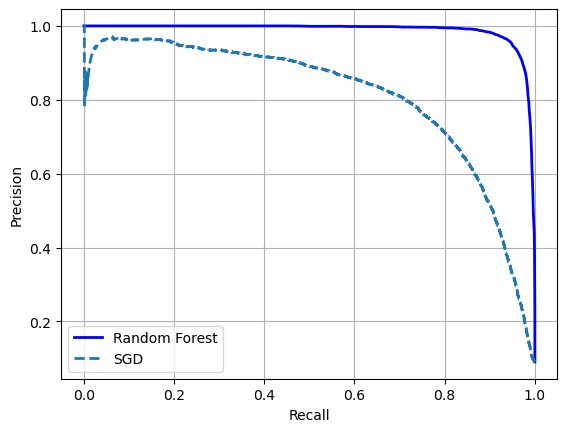

In [115]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend(loc="lower left")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [116]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [117]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [118]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [122]:
# scikit automatically chooses the best strategy for each model
# unlike above, scikit-learn used to OvO(all 10 digits) strategy instead of OvR(5 and non-5s)
# it trained 45 binary classifiers
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [132]:
# predicts correctly
svm_clf.predict([X[2]])

print('Predicted: ', svm_clf.predict([X[2]]), '\nActual: ', y_train[2])

Predicted:  ['4'] 
Actual:  4


In [135]:
# returns 10 instances. one instance for each digit
some_digit_scores = svm_clf.decision_function([X[2]])
some_digit_scores.round(2)

array([[ 1.76, -0.29,  7.23,  1.89,  9.3 ,  4.94,  3.84,  6.1 ,  1.75,
         8.19]])

In [137]:
some_digit_scores.argmax()

np.int64(4)

In [139]:
# list of target classes(digits from 0 to 9)
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [148]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [145]:
ovr_clf.predict([X[2]])

array(['4'], dtype='<U1')

In [147]:
len(ovr_clf.estimators_)

10

In [152]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

array(['3'], dtype='<U1')

In [155]:
sgd_clf.predict([X[0]])

print('Predicted: ', sgd_clf.predict([X[0]]), '\nActual: ', y_train[0])

Predicted:  ['3'] 
Actual:  5


In [156]:
sgd_clf.predict([X[2]])

print('Predicted: ', sgd_clf.predict([X[2]]), '\nActual: ', y_train[2])

Predicted:  ['4'] 
Actual:  4


In [159]:
sgd_clf.decision_function([X[0]]).round(2)

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

In [161]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [165]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(float))
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [166]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])